## Liniar regression Single variable

Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. 

$$
\text{Linear regression (single variable) models the relationship between an independent variable } x \text{ and a dependent variable } y \text{ as:}
\\[1em]\
$$
$$
y = m x + b
$$
$$
\\[1em]
\text{where:}
\\[1em]
\begin{align*}
y & : \text{Predicted value (dependent variable)} \\
x & : \text{Input value (independent variable)} \\
m & : \text{Slope of the line (regression coefficient)} \\
b & : \text{Intercept (value of } y \text{ when } x = 0)
\end{align*}
$$

In [ ]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
df = pd.read_csv('homeprices.csv')
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

LinearRegression()

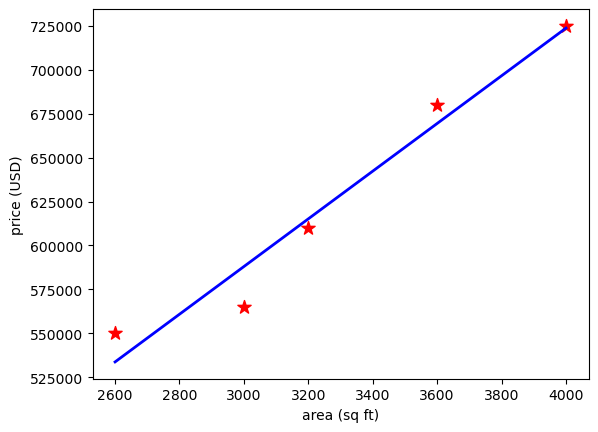

In [ ]:
%matplotlib inline
plt.xlabel('area (sq ft)')
plt.ylabel('price (USD)')
plt.scatter(df.area, df.price, color='red', marker='*', s=100)
plt.plot(df.area, reg.predict(df[['area']]), color='blue', linewidth=2)

In [ ]:
reg.coef_
reg.intercept_

180616.43835616432

In [ ]:
m = reg.coef_[0]
b = reg.intercept_
def predict_price(area):
    return m * area + b
predict_price(3000)

587979.4520547945

#### Making the linear regression model without the linear_model library

In [ ]:
def manual_linear_regression(x, y):
    """
    Calculates slope (m) and intercept (b) for y = m*x + b
    Args:
        x: 1D numpy array or pandas Series (independent variable)
        y: 1D numpy array or pandas Series (dependent variable)
    Returns:
        m: slope
        b: intercept
    """
    x,y,n = np.array(x), np.array(y), len(x)
    x_mean, y_mean = x.mean(), y.mean()

    m = ((x - x_mean) * (y - y_mean)).sum() / ((x - x_mean)**2).sum()
    b = y_mean - m * x_mean

    return m, b

m_manual, b_manual = manual_linear_regression(df['area'], df['price'])
print("Slope:", m_manual)
print("Intercept:", b_manual)

def predict_price_manual(area):
    return m_manual * area + b_manual

predict_price_manual(3000)



Slope: 135.7876712328767
Intercept: 180616.43835616444


587979.4520547945

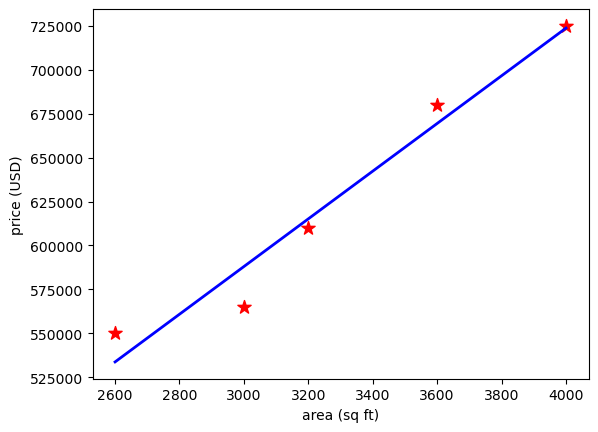

In [ ]:
plt.xlabel('area (sq ft)')
plt.ylabel('price (USD)')
plt.scatter(df.area, df.price, color='red', marker='*', s=100)

predicted_prices = m_manual * df['area'] + b_manual

plt.plot(df.area, predicted_prices, color='blue', linewidth=2)  # Use a different color to distinguish
plt.show()

## Liniar regression multiple variables

Linear regression with multiple variables (also called multiple linear regression) models the relationship between a dependent variable and two or more independent variables.

$$
\text{Multiple linear regression models the relationship as:}
\\[1em]
y = m_1 x_1 + m_2 x_2 + \dots + m_n x_n + b
\\[1em]
\text{where:}
\\[1em]
\begin{align*}
y & : \text{Predicted value (dependent variable)} \\
x_1, x_2, \dots, x_n & : \text{Input values (independent variables)} \\
m_1, m_2, \dots, m_n & : \text{Coefficients (slopes for each variable)} \\
b & : \text{Intercept (value of } y \text{ when all } x_i = 0)
\end{align*}
$$

In [13]:
df = pd.read_csv('homeprices_multivar.csv')
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [14]:
import math
median_bed = math.floor(df.bedrooms.median())
median_bed

4

In [15]:
df.bedrooms = df.bedrooms.fillna(df.bedrooms.mean())
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.2,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [16]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']], df.price)

LinearRegression()

In [17]:
def predict_price_multivar(area, bedrooms, age):
    return reg.predict([[area, bedrooms, age]])[0]

#### Making the linear regression model without the linear_model library

In [18]:
# ...existing code...

def manual_multivar_linear_regression(X, y):
    """
    Calculates coefficients for multiple linear regression using the normal equation.
    Args:
        X: 2D numpy array or pandas DataFrame (independent variables)
        y: 1D numpy array or pandas Series (dependent variable)
    Returns:
        coeffs: numpy array of coefficients (including intercept as the first element)
    """
    X = np.array(X)
    y = np.array(y)
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    # calculate coefficients using the normal equation
    # coeffs = (X_b^T * X_b)^-1 * X_b^T * y
    coeffs = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return coeffs

X = df[['area', 'bedrooms', 'age']]
y = df['price']

coeffs = manual_multivar_linear_regression(X, y)
print("Intercept:", coeffs[0])
print("Coefficients:", coeffs[1:])

def predict_price_manual_multivar(area, bedrooms, age):
    return coeffs[0] + coeffs[1]*area + coeffs[2]*bedrooms + coeffs[3]*age

Intercept: 231586.00639409805
Coefficients: [  116.66950551 18756.28806983 -3675.75111708]


Area against price

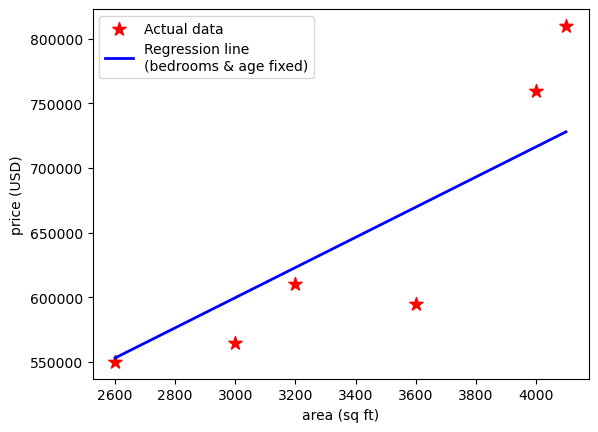

In [19]:
bedrooms_fixed = df['bedrooms'].mean()
age_fixed = df['age'].mean()

area_range = np.linspace(df['area'].min(), df['area'].max(), 100)

predicted_prices = predict_price_manual_multivar(area_range, bedrooms_fixed, age_fixed)

plt.xlabel('area (sq ft)')
plt.ylabel('price (USD)')
plt.scatter(df['area'], df['price'], color='red', marker='*', s=100, label='Actual data')
plt.plot(area_range, predicted_prices, color='blue', linewidth=2, label='Regression line\n(bedrooms & age fixed)')
plt.legend()
plt.show()

Bedrooms against price

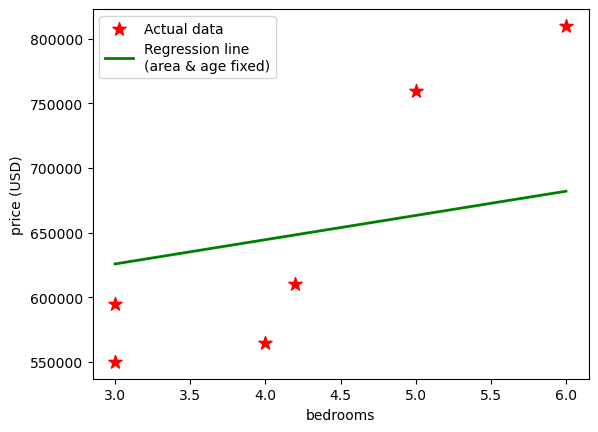

In [20]:
area_fixed = df['area'].mean()
age_fixed = df['age'].mean()
bedrooms_range = np.linspace(df['bedrooms'].min(), df['bedrooms'].max(), 100)
predicted_prices_bedrooms = predict_price_manual_multivar(area_fixed, bedrooms_range, age_fixed)

plt.xlabel('bedrooms')
plt.ylabel('price (USD)')
plt.scatter(df['bedrooms'], df['price'], color='red', marker='*', s=100, label='Actual data')
plt.plot(bedrooms_range, predicted_prices_bedrooms, color='green', linewidth=2, label='Regression line\n(area & age fixed)')
plt.legend()
plt.show()

Age against price

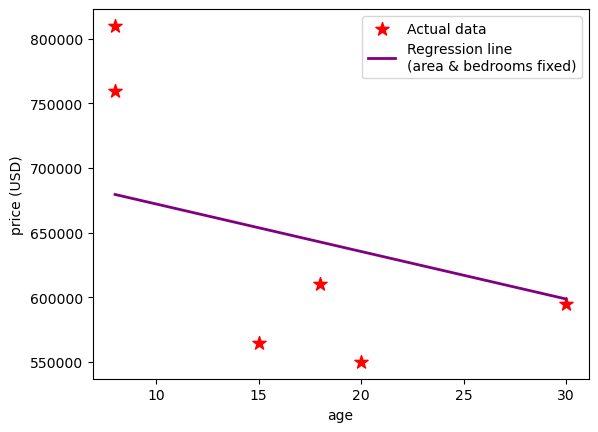

In [21]:
area_fixed = df['area'].mean()
bedrooms_fixed = df['bedrooms'].mean()
age_range = np.linspace(df['age'].min(), df['age'].max(), 100)
predicted_prices_age = predict_price_manual_multivar(area_fixed, bedrooms_fixed, age_range)

plt.xlabel('age')
plt.ylabel('price (USD)')
plt.scatter(df['age'], df['price'], color='red', marker='*', s=100, label='Actual data')
plt.plot(age_range, predicted_prices_age, color='purple', linewidth=2, label='Regression line\n(area & bedrooms fixed)')
plt.legend()
plt.show()